In [29]:
import random
import sys
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [206]:
def generate_input(size):
    with open("outputs/"+size+".out",'r') as file:
        l = [eval(line) for line in file]
    buses = np.array(l)
    num_buses = buses.shape[0]
    comms = buses.T
    comm_size = comms.shape[1]
    num_comms = comms.shape[0]
    all_nodes = np.ndarray.flatten(buses)
    edge_prob_comm = .8
    edge_prob_bus = .1
    edge_prob_across = .025
    G = nx.Graph()
    G.add_nodes_from(all_nodes)

    for bus in buses:
        for i, person1 in enumerate(bus):
            for person2 in bus[i:]:
                if person1 != person2:
                    if random.random() < edge_prob_bus:
                        G.add_edge(person1, person2)
    
    for i, comm1 in enumerate(comms):
        for comm2 in comms[i:]:
            if comm1[0] == comm2[0]:
                for person1 in comm1:
                    for person2 in comm2:
                        if random.random() < edge_prob_comm:
                            G.add_edge(person1, person2)
            else:
                for person1 in comm1:
                    for person2 in comm2:
                        if random.random() < edge_prob_across:
                            G.add_edge(person1,person2)

    nx.write_gml(G, "inputs/"+size+"/graph.gml")
    
    if size == "small":
        num_groups=100
    elif size == "medium":
        num_groups=1000
    else:
        num_groups=2000
    comm_num_groups = int(.8*(num_groups/num_comms))
    across_num_groups = int(.2*num_groups)
    
    rowdy_groups = []
    
    for comm in comms:
        for i in range(comm_num_groups):
            num_people = max([2,np.random.normal(comm_size/2, comm_size/8)])
            rowdy_groups.append(np.random.choice(comm, int(num_people), replace=False))
            
    nodes = G.nodes()
    for i in range(across_num_groups):
        num_people = max([2,np.random.normal(comm_size/2, comm_size/8)])
        rowdy_groups.append(np.random.choice(nodes, int(num_people), replace=False))
    
    rowdy_groups = list(map(list, rowdy_groups))
    
    with open("inputs/"+size+"/parameters.txt", "w") as file:
        file.write("%d\n" % num_buses)
        file.write("%d\n" % num_comms)
        for group in rowdy_groups:
            file.write("%s\n" % group)      

    """
    b = []
    for comm in comms[:6]:
        b.append(list(comm))
    for comm in comms[6:8]:
        for i in range(len(b)):
            b[i].append(comm[i])
        
    with open("outputs/small_naive.out", 'w') as file:
        for bus in b:
            file.write("%s\n" % bus)
    """
    
    return rowdy_groups

/Users/pawel/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/pawel/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/pawel/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/pawel/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

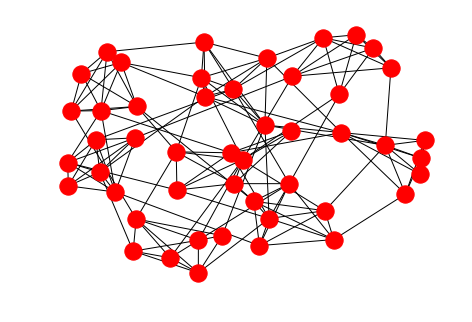

In [207]:
rowdy_groups = generate_input("small")
G = nx.read_gml("inputs/small/graph.gml")
nx.draw(G)
plt.figure(figsize=(20,10))
plt.show()

/Users/pawel/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/pawel/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/pawel/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/pawel/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

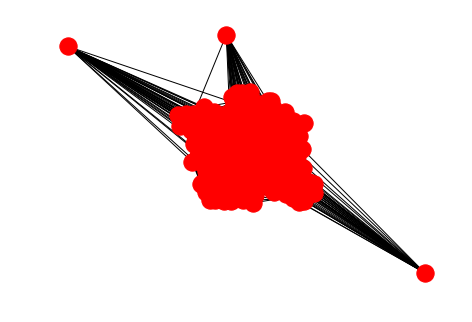

1000


In [201]:
rowdy_groups = generate_input("medium")
G = nx.read_gml("inputs/medium/graph.gml")
nx.draw(G)
plt.figure(figsize=(20,10))
plt.show()
print(len(rowdy_groups))

/Users/pawel/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/pawel/anaconda/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/pawel/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/pawel/anaconda/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is de

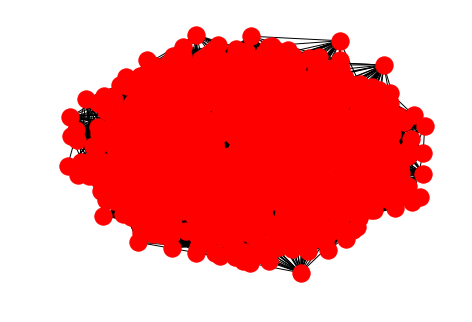

In [202]:
generate_input("large")
G = nx.read_gml("inputs/large/graph.gml")
nx.draw(G)
plt.figure(figsize=(20,10))
plt.show()

In [160]:
len(G.edges())

22987